<a href="https://colab.research.google.com/github/chaitshar/MachineLearningLabA4G1/blob/main/EXPT_5_ML_A4_G1_2K19_ME_072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [26]:
df=pd.read_csv("tennis.csv")
value=['Outlook','Temprature','Humidity','Wind']
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [27]:
len(df)           #Dataset Lenght

14

In [28]:
df.shape  #To see the number of rows and columns in our dataset:

(14, 5)

In [29]:
df.head()         #To inspect the first five records of the dataset:

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [30]:
df.tail()         #To inspect the last five records of the dataset:

,outlook,temp,humidity,windy,play
9,rainy,mild,normal,False,yes
10,sunny,mild,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes
13,rainy,mild,high,True,no


In [31]:
df.describe()     #To see statistical details of the dataset:

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,normal,False,yes
freq,5,6,7,8,9


In [32]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
df=df.apply(string_to_int.fit_transform) #fit and transform it
df

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [39]:
#To divide our data into attribute set and Label:
feature_cols = ['outlook','temp','humidity','windy']
X = df[feature_cols ]                               #contains the attribute 
y = df.play                              #contains the label

In [40]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [45]:
# perform training 
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier = DecisionTreeClassifier(criterion="gini")     # create a classifier object
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)  

In [47]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


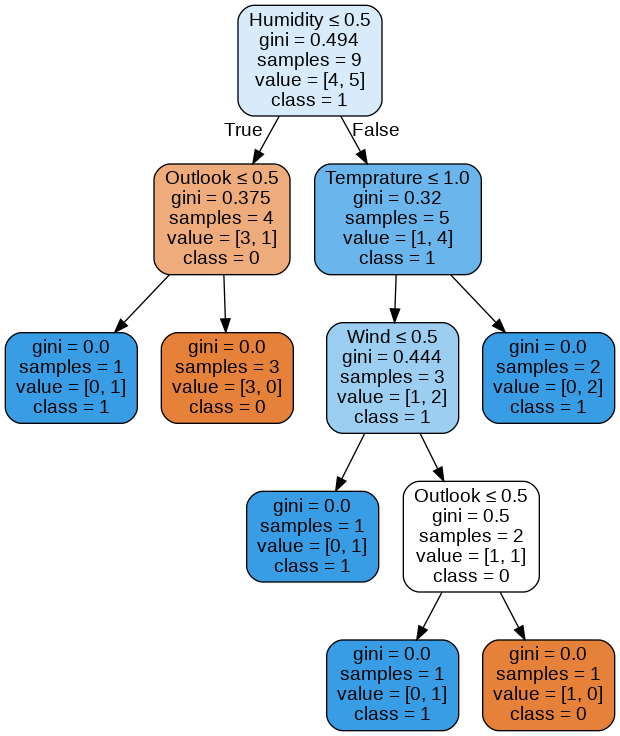

In [48]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())